We are now moving to the numerical treatment of quantum mechanics based on finite dimensional
linear algebra, which basically means matrices and vectors. This method will be discussed for 
simple problems, like the free particle and the harmonic oscillator, that can be
solved analytically.

So why use an approximation, if there is a better analytic solution available?
Because it is best to start with something easy and additionally we can compare
the quality of the numerical treatment with known exact solutions. This way
we get a feeling for the strengths and weaknesses of the numerical methods.
With this we have a better understanding of the limits, once we use these methods
for problems, where no analytic solution is possible.

## The discretization of space

[Last time][last] we already used discretization of the position space. Back then we used
equidistant discrete spatial positions

$$
x \in \{ x_0 + j \Delta x \, | \,  j \in \mathbb{N}_0 \land j < N \}
$$

with a separation of $\Delta x = L / N$, where $L$ is the length of the spatial interval to be considered,
to calculate $\psi (x_{j+1})$
from  $\psi(x_j)$ and $\psi'(x_j)$. So, basically we were moving a spatial
focus along the x-axis from $x_j$ to $x_{j+1}$. 


Now, however, we will consider the *whole* function $\psi(x)$ as a single unit
on all the discrete points in position space at once. 
For simplicity, this time
we will additionally use [*periodic boundary conditions*][period], which means that space 
repeats itself after a distance of $L$, that is $\psi(x + L) = \psi(x)$
(One can think of $\psi(x)$ living on a closed loop of size $L$).
Therefore we stop at $x_{N-1}$ and have the following
conditions for the boundaries:

$$
x_N = x_0 \quad \land \quad x_{-1} = x_{N -1}
$$


This means, we have $N$ 
values of $\psi(x)$ to consider: $\psi(x_0), \, \psi(x_1 = x_0 + \Delta x), \dots, \psi(x_{N-1} = x_0 + (N-1) \Delta x)$.
For convinience we will write $\psi(x_j) = \psi_j$ and we can combine all 
these function values into a tuple vector:

$$
\begin{aligned}
\text{discretize:} \quad
L^2\left( [x_0, x_0 + L] \right) &\to \mathbb{C}^{N} \\
\psi(x) &\mapsto 
\begin{pmatrix}
\psi_0 \\
\psi_1 \\
\vdots \\
\psi_{N-1}
\end{pmatrix}
\end{aligned}
$$

The operation *discretize* converts a vector $\psi(x)$ in the $L^2$ [Hilbert space][l2_space], whose
elements are functions, 
to a vector in the complex vector space $\mathbb{C}^{N}$, whose elements are complex $N$ tuples.
Of course this conversion is in general a *lossy* conversion, because the source Hilbert space
has infinite dimensions, but the target Hilbert space only has $N$.

Usually we do not start with a continuous function $\psi(x)$ and then execute the
*discretize* operation. 
It makes more sense to start directly in the discretized
version of the Hilbert space and use discrete versions of the quantum operators.
We now take a look at how we can find discrete versions of the operators.

[last]: https://znswanderer.github.io/blog/ODE-for-Schr%C3%B6dinger/
[l2_space]: https://en.wikipedia.org/wiki/Hilbert_space#Lebesgue_spaces
[period]: https://en.wikipedia.org/wiki/Periodic_boundary_conditions

## A discrete momentum operator

The Hamiltonian for the free particle is

$$
\hat{H} = \frac{1}{2m} \hat{p}^2 = -\frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2} \, .
$$

This includes the second derivative or the square of the momentum operator. To get a good approximation 
of the second derivative on a spatial grid with a spacing of $\Delta x$ one usually takes the [Taylor series][taylor]
of $\psi(x)$ for forward and backward points:

$$
\begin{aligned}
\psi(x + \Delta x) &= \psi(x) + \Delta x \psi'(x) + \frac{1}{2} {\Delta x}^2 \psi''(x) 
+ \frac{1}{6} {\Delta x}^3 \psi'''(x) + \mathcal{O}({\Delta x}^4) \\
\psi(x - \Delta x) &= \psi(x) - \Delta x \psi'(x) + \frac{1}{2} {\Delta x}^2 \psi''(x) 
- \frac{1}{6} {\Delta x}^3 \psi'''(x) + \mathcal{O}({\Delta x}^4)
\end{aligned}
$$

If we add both expansions we get 

$$
\psi''(x) = \frac{\psi(x - \Delta x) - 2 \psi(x) + \psi(x + \Delta x)}{{\Delta x}^2} + \mathcal{O}({\Delta x}^2)
$$

or if we use the $\psi_j$ notation and drop the $\mathcal{O}({\Delta x}^2)$ (keeping in mind,
that this is only an approximation)

$$
\psi''_j =  \frac{\psi_{j-1} - 2 \psi_j + \psi_{j+1}}{{\Delta x}^2}
$$

This can also be written as a matrix multiplication:

$$
\psi'' = \mathbf{D_2} \psi = 
\frac{1}{{\Delta x}^2}
\begin{pmatrix}
-2 & 1 & 0 & 0 &  1 \\
1 & -2 & 1 & 0 &  0 \\
0 & 1 & -2 & 1 &  0 \\
0 & 0 & 1 & -2 & 1  \\
1 & 0 & 0 & 1 & -2  
\end{pmatrix}
\begin{pmatrix}
\psi_0 \\
\psi_1 \\
\psi_2 \\
\psi_3 \\
\psi_4 
\end{pmatrix}
$$

For $N=5$. The single $1$'s in the upper-right and lower-left corner are there because we are
using periodic boundary conditions (pbc).
The matrix $\mathbf{D_2}$ corresponds to the operator for the second derivative in the above approximation.
The application of *every linear* operator (and we are dealing only with linear operators in quantum 
mechanics) can be written as a matrix multiplication.



[taylor]: https://en.wikipedia.org/wiki/Taylor_series

The $\mathbf{D_2}$ matrix can also be constructed as product of two matrices

$$
\begin{aligned}
\mathbf{D_2} &= 
\frac{1}{{\Delta x}^2}
\begin{pmatrix}
-2 & 1 & 0 & 0 &  1 \\
1 & -2 & 1 & 0 &  0 \\
0 & 1 & -2 & 1 &  0 \\
0 & 0 & 1 & -2 & 1  \\
1 & 0 & 0 & 1 & -2  
\end{pmatrix} \\
&=
\frac{1}{{\Delta x}}
\begin{pmatrix}
1 & 0 & 0 & 0 &  -1 \\
-1 & 1 & 0 & 0 &  0 \\
0 & -1 & 1 & 0 &  0 \\
0 & 0 & -1 & 1 & 0  \\
0 & 0 & 0 & -1 & 1  
\end{pmatrix}
\frac{1}{{\Delta x}}
\begin{pmatrix}
-1 & 1 & 0 & 0 &  0 \\
0 & -1 & 1 & 0 &  0 \\
0 & 0 & -1 & 1 &  0 \\
0 & 0 & 0 & -1 & 1  \\
1 & 0 & 0 & 0 & -1  
\end{pmatrix} \\
&= \mathbf{D_-} \mathbf{D_+}
\end{aligned}
$$

It's easy to see, that the two matrices $\mathbf{D_-}$ and $\mathbf{D_+}$ correspond to the first derivative in forward
and backward order:

$$
\begin{aligned}
\mathbf{D_+} \psi &:  \, \psi'(x) \approx \frac{\psi(x + \Delta x) - \psi(x)}{\Delta x} \\
\\
\mathbf{D_-} \psi &: \, \psi'(x) \approx \frac{\psi(x) - \psi(x - \Delta x)}{\Delta x} 
\end{aligned}
$$

So there is no single discrete momentum operator, but two versions corresponing to a forward and a backward difference,
which makes sense, because this was the way we constructed the second derivative above.

## Sparse Matrices

One great advantage of moving from the continuous to the discrete description is that
we can now use all the numerical methods from linear algebra (LA), that SciPy has to offer.
The time-independent Schrödinger equation becomes a LA eigenvalue problem.

In principle, we could just construct the matrix $\mathbf{D_2}$ for any spatial resolution $N$ and
use the LA algorithms, but if one takes a closer look at $\mathbf{D_2}$ one realizes, that
most of the entries in the matrix are empty, that means equal to $0$. Representing
a "dense" matrix in python, which means keeping track of all values, regardless if they
are $0$ or not, will need $N^2$ memory entries. And additionally, if we do algebra with
this matrix we will have to consider all $N^2$ entries. But in the $\mathbf{D_2}$ matrix
only $3N$ entries are different from zero. So we are wasting a lot of memory and computing
power if the take a dense matrix with $N^2$ instead of just using the $3N$ relevant entries.

Luckily SciPy offers the [scipy.sparse][sparse] module, which provides so called "sparse" 
matrices, that only store the non-zero elements of a matrix. Let's see, how we can use
that!

[sparse]: https://docs.scipy.org/doc/scipy/reference/sparse.html

In [61]:
import numpy as np
from scipy import sparse
import scipy.sparse.linalg as linalg
import matplotlib.pyplot as plt

In [62]:
plt.rcParams['figure.dpi'] = 300
#plt.rc('axes', labelsize=10, titlesize=10)
plt.rc('figure', figsize = (5, 4))    # Reduces overall size of figures
#plt.rc('figure', autolayout = True)     # Adjusts supblot parameters for new size
plt.style.use(['science', 'notebook', 'grid', 'vibrant'])
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [63]:
N = 100
D2 = sparse.diags([1, -2, 1], [-1, 0, 1], shape=(N, N)) * N**2
D2

<100x100 sparse matrix of type '<class 'numpy.float64'>'
	with 298 stored elements (3 diagonals) in DIAgonal format>

This defines a sparse version of the $\mathbf{D_2}$ matrix by specifying three diagonals for the given spatial resolution N. 
We use unit length for the considered spatial dimension $L=1$, giving $\Delta x = 1/N$.

As we can see from the output, the used memory for this matrix is
not $100 \times 100$, but $298$. But we were expecting $300$ values, what is happening here? Let's
take a look at a dense version of this matrix:

In [64]:
D2.toarray()

array([[-20000.,  10000.,      0., ...,      0.,      0.,      0.],
       [ 10000., -20000.,  10000., ...,      0.,      0.,      0.],
       [     0.,  10000., -20000., ...,      0.,      0.,      0.],
       ...,
       [     0.,      0.,      0., ..., -20000.,  10000.,      0.],
       [     0.,      0.,      0., ...,  10000., -20000.,  10000.],
       [     0.,      0.,      0., ...,      0.,  10000., -20000.]])

Ok, in the first and last row we are missing the contributions from the periodic boundary conditions.
To get these, we have to include two more diagonals, that will only consists of a single element:

In [65]:
D2_pbc = sparse.diags([1, -2, 1, 1, 1], [-1, 0, 1, N-1, -N+1], shape=(N, N)) * N**2
D2_pbc

<100x100 sparse matrix of type '<class 'numpy.float64'>'
	with 300 stored elements (5 diagonals) in DIAgonal format>

This time we have the expected $3N$ elements and we can see the newcomers in the dense version:

In [66]:
D2_pbc.toarray()

array([[-20000.,  10000.,      0., ...,      0.,      0.,  10000.],
       [ 10000., -20000.,  10000., ...,      0.,      0.,      0.],
       [     0.,  10000., -20000., ...,      0.,      0.,      0.],
       ...,
       [     0.,      0.,      0., ..., -20000.,  10000.,      0.],
       [     0.,      0.,      0., ...,  10000., -20000.,  10000.],
       [ 10000.,      0.,      0., ...,      0.,  10000., -20000.]])

## Eigenvalues

With this matrix we can now solve the time-independent Schrödinger equation for the free particle

$$
E \psi(x) = \hat{H} \psi(x) = -\frac{\hbar^2}{2m} \frac{\partial^2 \psi(x)}{\partial x^2}
$$

as a linear algebra problem:

$$
E_n \ket{n} = - \frac{\hbar^2}{2m} \mathbf{D_2} \ket{n}
$$

*For the rest of this blog post I will now use the ket-vector notation $\ket{n}$ for the discrete column vector with $N$ entries.
The corresponding wave function will be written as $\psi_n(x)$.*

To find the eigenvalues and vectors we can use the `eigsh` function of the `scipy.sparse.linalg` module,
which returns the eigenvalues and vectors of a matrix:

In [67]:
hbar = 1
m = 1
# Look for the eigenvalues for both matrices
eigvals, eigvecs = linalg.eigsh(-(hbar**2/(2*m)) * D2, k=10, which='SM')
eigvals_pbc, eigvecs_pbc = linalg.eigsh(-(hbar**2/(2*m)) * D2_pbc, k=10, which='SM')

With the parameters `k = 10, which = 'SM'` we are asking for the 10 smallest eigenvalues and the corresponding vectors. And 
now let's take a look at the smallest eigenvectors for both matrices:

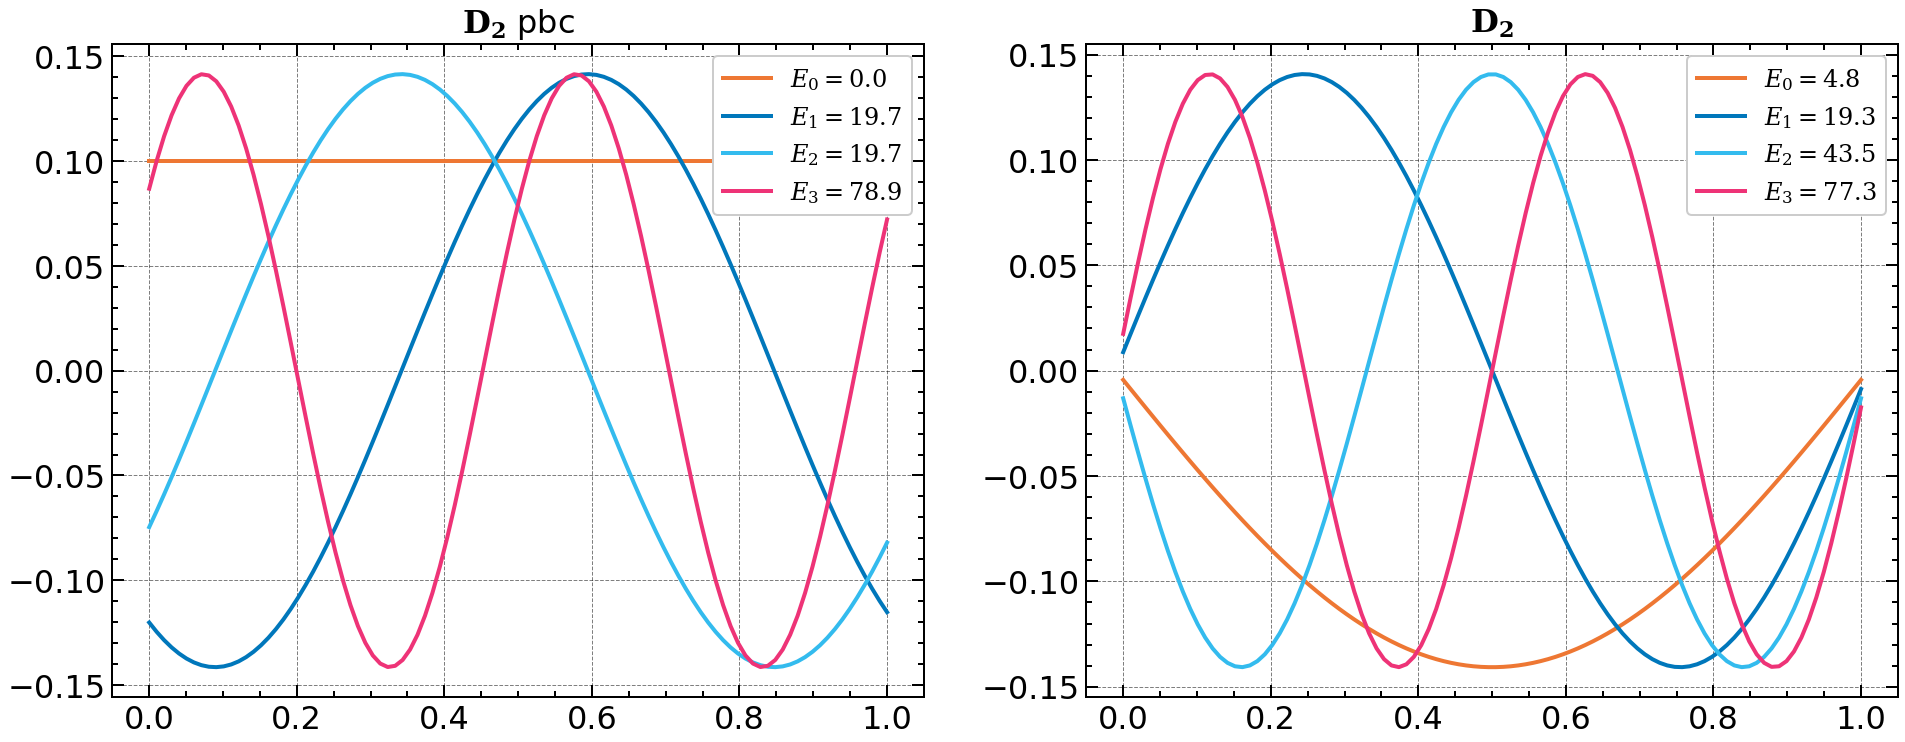

In [68]:
x = np.linspace(0, 1, N)
plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
for n in range(4):
    plt.plot(x, eigvecs_pbc.T[n], label=r"$E_{} = {:.1f}$".format(n, eigvals_pbc[n]))
plt.legend(loc='upper right', fontsize=12)
plt.title("$\mathbf{D_2}$ pbc");

plt.subplot(1, 2, 2)
for n in range(4):
    plt.plot(x, eigvecs.T[n], label=r"$E_{} = {:.1f}$".format(n, eigvals[n]))
plt.legend(loc='upper right', fontsize=12)
plt.title("$\mathbf{D_2}$");

We can clearly see some differences in the eigenvectors for $\mathbf{D_2}$ and $\mathbf{D_2pbc}$.
For the pbc matrix the ground state corresponds to  $\psi_0(x) = \text{const}$, whereas in the not periodic
case we have the discrete version of $\psi_0(x) \propto \sin(\pi x)$. And the eigenfunction
for $E_2$ is $\psi_2(x) = \sin(3 \pi x)$ in the non-periodic case.
So the eigenvectors for $\mathbf{D_2}$ correspond to the solution for the [particle in a box][box].
But why?

The first and last rows of the expression $\mathbf{D_2} \psi$ translate to:

$$
\begin{aligned}
\left(\mathbf{D_2} \psi \right)_0 &= \frac{1}{{\Delta x}^2} \left( 0 \cdot \psi_{-1}  -2 \cdot \psi_0 + 1 \cdot \psi_1 \right) \\
\left(\mathbf{D_2} \psi \right)_{N-1} &=\frac{1}{{\Delta x}^2} \left( 1 \cdot \psi_{N-2} -2 \cdot \psi_{N-1}  + 0 \cdot \psi_{N} \right) 
\end{aligned}
$$

So this are basically the boundary conditions 
$\psi_{-1} = 0$ and $\psi_{N} = 0$. And these boundary conditions describe a particle in a box.

For the $\mathbf{D_2}$ matrix in the periodic boundary conditions (left picture), we see that
there are no solutions like $\sin(\pi x)$ or $\sin(3 \pi x)$, because they can not be periodic
with continuous first derivatives. Additionally all eigenvalues are degenerate (with exception of
the ground state). This is because, in contrast to the particle in a box, the particle here
is moving on the x-axis. The two eigenvectors for the same energy belong to solutions 
moving left or right.

The two versions of the $\mathbf{D_2}$ matrix differ only by two corner entries.
It's strange, that these small differences have such an effect: 
small glitches in the matrix will only allow repeating solutions. One 
could call them *déjà vu* solutions.

[box]: https://en.wikipedia.org/wiki/Particle_in_a_box

Let's take a closer look at the eigenvalues! We know from the discussion of the particle in a box,
that the eigenvalues should be

$$
E_n = \frac{(n+1)^2 \pi^2 \hbar^2}{2mL^2}
$$

If we compare these with the eigenvalues for the $\mathbf{D_2}$ matrix (the pbc matrix will show similar results) we find:

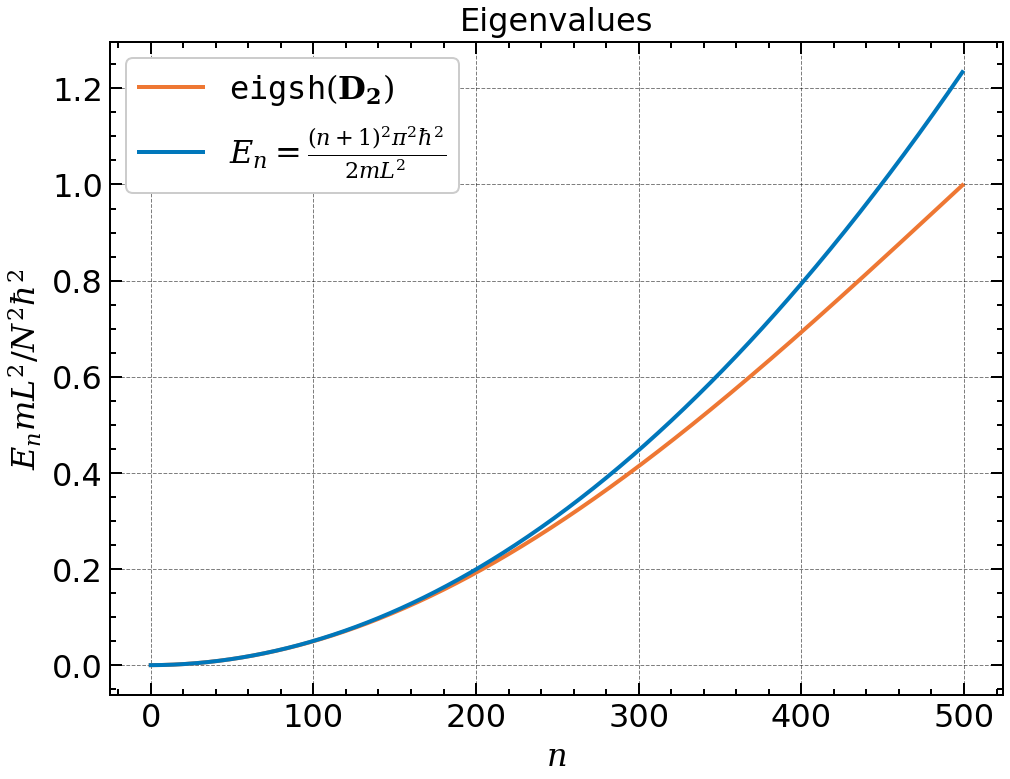

In [69]:
N = 1000 # better spatial resolution
D2 = sparse.diags([1, -2, 1], [-1, 0, 1], shape=(N, N)) * N**2

hbar = 1
m = 1
L = 1
eigvals, eigvecs = linalg.eigsh(-(hbar**2/(2*m)) * D2, k=N-1, which='SM')

N_eig = 500    # only show the first half
plt.figure(figsize=(8,6))
n = np.arange(0, N_eig)
plt.plot(n, eigvals[0:N_eig]/N**2, label=r"$\mathtt{eigsh}(\mathbf{D_2})$")
plt.plot(n, (n+1)**2 * np.pi**2 * hbar**2 / (2 * m * L * N**2), 
         label=r"$E_n = \frac{(n+1)^2 \pi^2 \hbar^2}{2mL^2}$")
plt.title("Eigenvalues")
plt.xlabel("$n$")
plt.ylabel(r"$E_n m L^2 / N^2 \hbar^2$")
plt.legend();

We see, that for low energies the eigenvalues of the discrete operator $\mathbf{D_2}$
are pretty much the same as the one for the continuous operator. But for higher
energies the discretization becomes apparent. This is not surprising as in the discrete
case there must exist a upper boundary for the energy as a discrete space cannot
support waves with smaller and smaller wavelength.

In fact the eigenvalues will have the following functional form:

$$
E_n = \frac{4N^2 \hbar^2}{2mL^2} \sin^2 \left( \frac{(n+1) \pi}{2 N} \right)
$$

(The derivation can be found on [wikipedia][wiki])

In the following graph one can clearly see, that this formula describes the 
eigenvalues perfectly:

[wiki]: https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors_of_the_second_derivative#Dirichlet_case

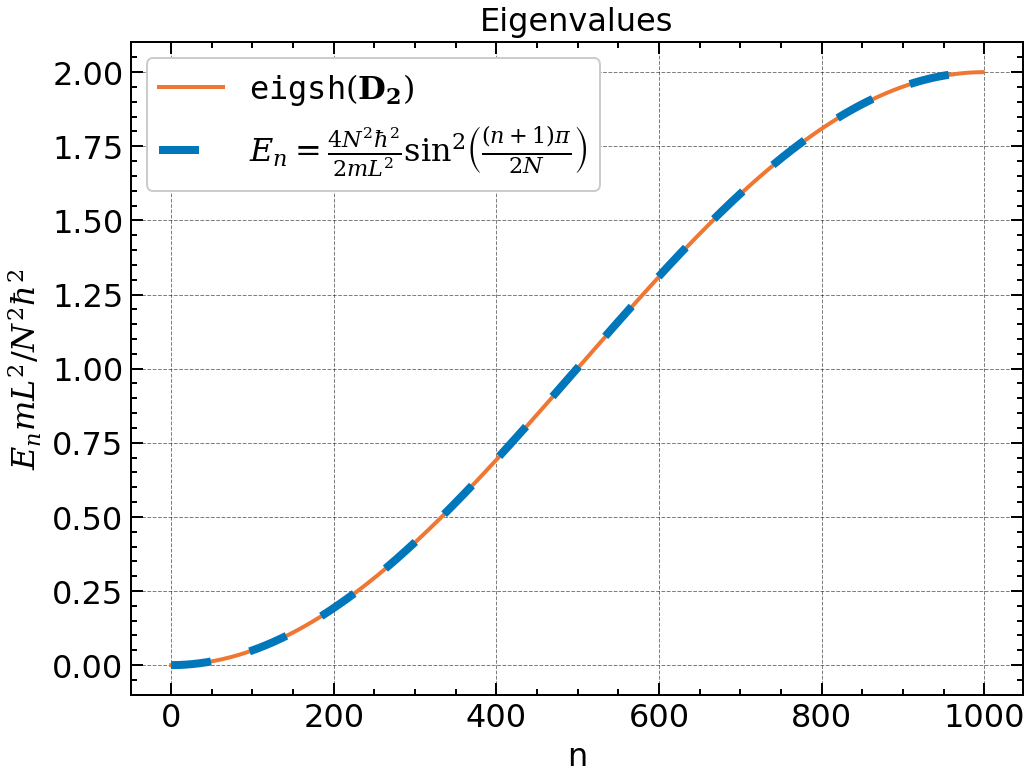

In [70]:
N_eig = N - 1
plt.figure(figsize=(8,6))
n = np.arange(0, N_eig)
plt.plot(n, eigvals[0:N_eig]/N**2, label=r"$\mathtt{eigsh}(\mathbf{D_2})$")
plt.plot(n, ((4 * hbar**2)/ (2 * m * L**2)) * np.sin((n+1)*np.pi / (2*N))**2, 
     linestyle=(0, (5, 5)), linewidth=4,
     label=r"$E_n =\frac{4N^2 \hbar^2}{2mL^2}\sin^2 \left(\frac{(n+1) \pi}{2 N}\right)$")
plt.title("Eigenvalues")
plt.xlabel("n")
plt.ylabel(r"$E_n m L^2 / N^2 \hbar^2$")
plt.legend();

## Closing remarks

For low energies (the small eigenvalues) the discrete matrix $\mathbf{D_2}$ approximates
the continuous second derivative quite well. This can also be seen, if we compare the 
formulas for the eigenvalues:

$$
\frac{4N^2 \hbar^2}{2mL^2} \sin^2 \left( \frac{(n+1) \pi}{2 N} \right) 
\approx
\frac{(n+1)^2 \pi^2 \hbar^2}{2mL^2}
\quad
\mathrm{for}
\quad n \ll N
$$

So we would expect, that in the low energy regime we can use the discretization
of space for solving quantum problems. In order for that, we must make
sure, that $N$ is always large enough, such that the highest energy component $n_{\max}$
of the simulated system satisfies $n_{\max} \ll N$. 

As mentioned in the beginning,
the conversion from the continuous Hilbert space to the discrete Hilbert space
is in general a *lossy* conversion. Only for low energies, the conversion 
is valid. Higher energies open the investigation of finer spatial details,
so it is no wonder, that in this limit we see the discretization of space 
and the approximation is no longer valid.